In [1]:
!nvidia-smi

Sun Jan 28 12:33:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
! pip install -q transformers[sentencepiece] fastbook fastai ohmeow-blurr nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [4]:
pip install torch==2.1.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [5]:
pip install torchaudio==2.1.0+cu121 torchdata==0.7.0 torchtext==0.16.0


In [6]:
import torch
from transformers import AutoModelForSequenceClassification, AutoConfig
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

/usr/local/lib/python3.10/dist-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:752: FutureWarning: The repository for squad contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.16.1/metrics/squad/squad.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
%cd /content/drive/MyDrive/NLP_Project2

/content/drive/MyDrive/NLP_Project2


In [9]:
df = pd.read_csv("all_data.csv")
df.head()

,title,url,abstract,tasks
0,Active Learning for Convolutional Neural Networks: A Core-Set Approach,https://paperswithcode.com/paper/active-learning-for-convolutional-neural,"Convolutional neural networks (CNNs) have been successfully applied to many recognition and learning tasks using a universal recipe; training a deep model on a very large dataset of supervised examples. However, this approach is rather restrictive in practice since collecting a large set of labeled images is very expensive. One way to ease this problem is coming up with smart ways for choosing images to be labelled from a very large collection (ie. active learning). Our empirical study suggests that many of the active learning heuristics in the literature are not effective when applied to ...","['Active Learning', 'Image Classification']"
1,Variational Adversarial Active Learning,https://paperswithcode.com/paper/variational-adversarial-active-learning,"Active learning aims to develop label-efficient algorithms by sampling the most representative queries to be labeled by an oracle. We describe a pool-based semi-supervised active learning algorithm that implicitly learns this sampling mechanism in an adversarial manner. Unlike conventional active learning algorithms, our approach is task agnostic, i.e., it does not depend on the performance of the task for which we are trying to acquire labeled data. Our method learns a latent space using a variational autoencoder (VAE) and an adversarial network trained to discriminate between unlabeled a...","['Active Learning', 'Image Classification', 'Semantic Segmentation']"
2,Learning Loss for Active Learning,https://paperswithcode.com/paper/190503677,"The performance of deep neural networks improves with more annotated data. The problem is that the budget for annotation is limited. One solution to this is active learning, where a model asks human to annotate data that it perceived as uncertain. A variety of recent methods have been proposed to apply active learning to deep networks but most of them are either designed specific for their target tasks or computationally inefficient for large networks. In this paper, we propose a novel active learning method that is simple but task-agnostic, and works efficiently with the deep networks. We...","['Active Learning', 'Image Classification', 'object-detection', 'Object Detection', 'Pose Estimation']"
3,Active learning in annotating micro-blogs dealing with e-reputation,https://paperswithcode.com/paper/active-learning-in-annotating-micro-blogs,"Elections unleash strong political views on Twitter, but what do people really think about politics? Opinion and trend mining on micro blogs dealing with politics has recently attracted researchers in several fields including Information Retrieval and Machine Learning (ML). Since the performance of ML and Natural Language Processing (NLP) approaches are limited by the amount and quality of data available, one promising alternative for some tasks is the automatic propagation of expert annotations. This paper intends to develop a so-called active learning process for automatically annotating...","['Active Learning', 'Information Retrieval', 'Opinion Mining', 'Retrieval', 'Topic Classification']"
4,libact: Pool-based Active Learning in Python,https://paperswithcode.com/paper/libact-pool-based-active-learning-in-python,"libact is a Python package designed to make active learning easier for general users. The package not only implements several popular active learning strategies, but also features the active-learning-by-learning meta-algorithm that assists the users to automatically select the best strategy on the fly. Furthermore, the package provides a unified interface for implementing more strategies, models and application-specific labelers. The package is open-source on Github, and can be easily installed from Python Package Index repository.",['Active Learning']


In [10]:
df.shape

(26778, 4)

In [11]:
df = df.dropna().reset_index(drop=True)
df.shape

(26778, 4)

In [12]:
df.columns

Index(['title', 'url', 'abstract', 'tasks'], dtype='object')

In [13]:
#total tasks
tasks_list = df.tasks.to_list()
task_count = {}
for tasks in tasks_list:
  task_list = eval(tasks)
  for task in task_list:
    if task in task_count.keys():
      task_count[task] += 1
    else:
      task_count[task] = 1
print(f"Number of Tasks: {len(task_count)}")
print(task_count)

Number of Tasks: 2397
{'Active Learning': 221, 'Image Classification': 897, 'Semantic Segmentation': 1932, 'object-detection': 851, 'Object Detection': 958, 'Pose Estimation': 155, 'Information Retrieval': 551, 'Opinion Mining': 53, 'Retrieval': 1536, 'Topic Classification': 35, 'Model Optimization': 16, 'valid': 140, 'Self-Supervised Learning': 403, 'Test': 804, 'Spam detection': 9, 'Benchmarking': 264, 'Segmentation': 1649, 'Clustering': 397, 'Community Detection': 65, 'Experimental Design': 17, 'Informativeness': 54, 'Federated Learning': 156, 'Gaussian Processes': 31, 'Physical Simulations': 2, 'Uncertainty Quantification': 58, 'Data Integration': 9, 'Classification': 1018, 'Domain Adaptation': 810, 'regression': 211, 'Text-to-Image Generation': 115, 'Transfer Learning': 858, 'Adversarial Attack': 84, 'Model extraction': 9, 'Decision Making': 339, 'Property Prediction': 39, 'Variational Inference': 98, '3D Object Detection': 168, 'Object': 523, 'Out-of-Distribution Detection': 48, 

In [14]:
#finding rare tasks
threshold = int(len(df) * 0.002)
rare_tasks = [key for key, value in task_count.items() if value < threshold]
len(rare_tasks), rare_tasks[:5]

(2139,
 ['Topic Classification',
  'Model Optimization',
  'Spam detection',
  'Experimental Design',
  'Gaussian Processes'])

In [15]:
#dropping rows with only rare tasks
tasks_list = df.tasks.to_list()
revised_task_list = []
indices_to_drop = []

for idx, tasks in enumerate(tasks_list):
  task_list = eval(tasks)
  revised_tasks = []

  for task in task_list:
    if task not in rare_tasks:
      revised_tasks.append(task)

  if len(revised_tasks) == 0:
    indices_to_drop.append(idx)
  else:
    revised_task_list.append(revised_tasks)

df = df.drop(indices_to_drop).reset_index(drop=True)
df.shape

(26628, 4)

In [16]:
df['revised_tasks'] = revised_task_list

In [17]:
df.sample()

,title,url,abstract,tasks,revised_tasks
12572,Bias Correction of Learned Generative Models using Likelihood-Free Importance Weighting,https://paperswithcode.com/paper/bias-correction-of-learned-generative-models,"A learned generative model often produces biased statistics relative to the underlying data distribution. A standard technique to correct this bias is importance sampling, where samples from the model are weighted by the likelihood ratio under model and true distributions. When the likelihood ratio is unknown, it can be estimated by training a probabilistic classifier to distinguish samples from the two distributions. We employ this likelihood-free importance weighting method to correct for the bias in generative models. We find that this technique consistently improves standard goodness-o...",['Data Augmentation'],[Data Augmentation]


In [18]:
revised_tasks_list = df.revised_tasks.to_list()
revised_task_count = {}
for tasks in revised_tasks_list:
  task_list = tasks
  for task in task_list:
    if task in revised_task_count.keys():
      revised_task_count[task] += 1
    else:
       revised_task_count[task]= 1
print(f"Number of Tasks: {len(revised_task_count)}")
print(revised_task_count)

Number of Tasks: 258
{'Active Learning': 221, 'Image Classification': 897, 'Semantic Segmentation': 1932, 'object-detection': 851, 'Object Detection': 958, 'Pose Estimation': 155, 'Information Retrieval': 551, 'Opinion Mining': 53, 'Retrieval': 1536, 'valid': 140, 'Self-Supervised Learning': 403, 'Test': 804, 'Benchmarking': 264, 'Segmentation': 1649, 'Clustering': 397, 'Community Detection': 65, 'Informativeness': 54, 'Federated Learning': 156, 'Uncertainty Quantification': 58, 'Classification': 1018, 'Domain Adaptation': 810, 'regression': 211, 'Text-to-Image Generation': 115, 'Transfer Learning': 858, 'Adversarial Attack': 84, 'Decision Making': 339, 'Variational Inference': 98, '3D Object Detection': 168, 'Object': 523, 'Drug Discovery': 53, 'speech-recognition': 260, 'Speech Recognition': 280, 'counterfactual': 109, 'Reinforcement Learning (RL)': 797, 'Graph Learning': 151, 'Node Classification': 356, 'Unsupervised Domain Adaptation': 261, 'Model Selection': 69, 'Image Segmentatio

In [19]:
encode_task_types = { key: idx for idx, (key, value) in enumerate(revised_task_count.items())}
with open("task_types_encoded.json", "w") as fp:
  json.dump(encode_task_types, fp)

In [20]:
# We need this because for multilabel classification all genres have possibility to be present in the predictions
categorical_task_list = []
revised_tasks_list = df.revised_tasks.to_list()

for revised_tasks in revised_tasks_list:
  categorical_list = [0] * len(encode_task_types)
  for task in revised_tasks:
    task_type_index = encode_task_types[task]
    categorical_list[task_type_index] = 1
  categorical_task_list.append(categorical_list)

categorical_task_list[3][:23]

[1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [21]:
df['task_cat_list']=categorical_task_list
df.head()

,title,url,abstract,tasks,revised_tasks,task_cat_list
0,Active Learning for Convolutional Neural Networks: A Core-Set Approach,https://paperswithcode.com/paper/active-learning-for-convolutional-neural,"Convolutional neural networks (CNNs) have been successfully applied to many recognition and learning tasks using a universal recipe; training a deep model on a very large dataset of supervised examples. However, this approach is rather restrictive in practice since collecting a large set of labeled images is very expensive. One way to ease this problem is coming up with smart ways for choosing images to be labelled from a very large collection (ie. active learning). Our empirical study suggests that many of the active learning heuristics in the literature are not effective when applied to ...","['Active Learning', 'Image Classification']","[Active Learning, Image Classification]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
1,Variational Adversarial Active Learning,https://paperswithcode.com/paper/variational-adversarial-active-learning,"Active learning aims to develop label-efficient algorithms by sampling the most representative queries to be labeled by an oracle. We describe a pool-based semi-supervised active learning algorithm that implicitly learns this sampling mechanism in an adversarial manner. Unlike conventional active learning algorithms, our approach is task agnostic, i.e., it does not depend on the performance of the task for which we are trying to acquire labeled data. Our method learns a latent space using a variational autoencoder (VAE) and an adversarial network trained to discriminate between unlabeled a...","['Active Learning', 'Image Classification', 'Semantic Segmentation']","[Active Learning, Image Classification, Semantic Segmentation]","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
2,Learning Loss for Active Learning,https://paperswithcode.com/paper/190503677,"The performance of deep neural networks improves with more annotated data. The problem is that the budget for annotation is limited. One solution to this is active learning, where a model asks human to annotate data that it perceived as uncertain. A variety of recent methods have been proposed to apply active learning to deep networks but most of them are either designed specific for their target tasks or computationally inefficient for large networks. In this paper, we propose a novel active learning method that is simple but task-agnostic, and works efficiently with the deep networks. We...","['Active Learning', 'Image Classification', 'object-detection', 'Object Detection', 'Pose Estimation']","[Active Learning, Image Classification, object-detection, Object Detection, Pose Estimation]","[1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
3,Active learning in annotating micro-blogs dealing with e-reputation,https://paperswithcode.com/paper/active-learning-in-annotating-micro-blogs,"Elections unleash strong political views on Twitter, but what do people really think about politics? Opinion and trend mining on micro blogs dealing with politics has recently attracted researchers in several fields including Information Retrieval and Machine Learning (ML). Since the performance of ML an

# Dataloaders and Modeling

In [22]:
labels = list(encode_task_types.keys())

In [23]:
# model_name = "haining/scientific_abstract_simplification"
model_name="distilroberta-base"
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(labels)

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)
hf_model.config.problem_type = "multi_label_classification"

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

In [24]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), MultiCategoryBlock(encoded=True,vocab=labels))
dblock = DataBlock(blocks=blocks, get_x=ColReader('abstract'), get_y=ColReader('task_cat_list'), splitter=RandomSplitter(valid_pct=0.1, seed=42))

In [25]:
dls = dblock.dataloaders(df, bs=32)
torch.save(dls, "dataloaders/dls-multilabel-paper-classifier.pkl")

In [26]:
dls.vocab

['Active Learning', 'Image Classification', 'Semantic Segmentation', 'object-detection', 'Object Detection', 'Pose Estimation', 'Information Retrieval', 'Opinion Mining', 'Retrieval', 'valid', 'Self-Supervised Learning', 'Test', 'Benchmarking', 'Segmentation', 'Clustering', 'Community Detection', 'Informativeness', 'Federated Learning', 'Uncertainty Quantification', 'Classification', 'Domain Adaptation', 'regression', 'Text-to-Image Generation', 'Transfer Learning', 'Adversarial Attack', 'Decision Making', 'Variational Inference', '3D Object Detection', 'Object', 'Drug Discovery', 'speech-recognition', 'Speech Recognition', 'counterfactual', 'Reinforcement Learning (RL)', 'Graph Learning', 'Node Classification', 'Unsupervised Domain Adaptation', 'Model Selection', 'Image Segmentation', 'Medical Image Classification', 'Medical Image Segmentation', 'Continual Learning', 'Brain Tumor Segmentation', 'Multi-Label Classification', 'Tumor Segmentation', 'Binary Classification', 'Anatomy', 'Au

In [27]:
dls.show_batch(dataloaders=dls, max_n=4, trunc_at=512)

,text,target
0,"Les m{\'e}thodes d{'}apprentissage de plongements lexicaux constituent d{\'e}sormais l{'}{\'e}tat de l{'}art pour la repr{\'e}sentation du vocabulaire et des documents sous forme de vecteurs dans de nombreuses t{\^a}ches de Traitement Automatique du Langage Naturel (TALN). Dans ce travail, nous consid{\'e}rons l{'}apprentissage et l{'}usage de plongements lexicaux dans le cadre de corpus en langue de sp{\'e}cialit{\'e} de petite taille. En particulier, nous souhaitons savoir si dans ce cadre, il est pr{\'e","[Word Embeddings, Learning Word Embeddings]"
1,"Large language models (LLMs) have brought significant and transformative changes in human society. These models have demonstrated remarkable capabilities in natural language understanding and generation, leading to various advancements and impacts across several domains. We consider the in-context learning under two formulation for attention related regression in this work. Given matrices\nA\n1\n∈\nR\nn\n×\nd\n, and\nA\n2\n∈\nR\nn\n×\nd\nand\nB\n∈\nR\nn\n×\nn\n, the purpose is to solve some certain optimization problems: Normali","[regression, Natural Language Understanding]"
2,"In this paper, we develop a series of differential privacy (DP) algorithms from a family of random projections (RP) for general applications in machine learning, data mining, and information retrieval. Among the presented algorithms, iDP-SignRP is remarkably effective under the setting of ``individual differential privacy'' (iDP), based on sign random projections (SignRP). Also, DP-SignOPORP considerably improves existing algorithms in the literature under the standard DP setting, using ``one permutation +","[Information Retrieval, Retrieval, Quantization]"
3,"It is a challenging task to learn discriminative representation from images and videos, due to large local redundancy and complex global dependency in these visual data. Convolution neural networks (CNNs) and vision transformers (ViTs) have been two dominant frameworks in the past few years. Though CNNs can efficiently decrease local redundancy by convolution within a small neighborhood, the limited receptive field makes it hard to capture global dependency. Alternatively, ViTs can effectively capture long","[Image Classification, Semantic Segmentation, object-detection, Object Detection, Pose Estimation, Representation Learning]"


In [28]:
model = BaseModelWrapper(hf_model)

acc_02 = partial(accuracy_multi, thresh=0.2)

learner = Learner(dls,
                  model,
                  opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
                  loss_func=BCEWithLogitsLossFlat(),
                  metrics=[acc_02],
                  cbs=[BaseModelCallback],
                  splitter=blurr_splitter
                  ).to_fp16()

## Stage- 0

In [29]:
learner.freeze()

SuggestedLRs(slide=0.010964781977236271, valley=0.0002754228771664202)

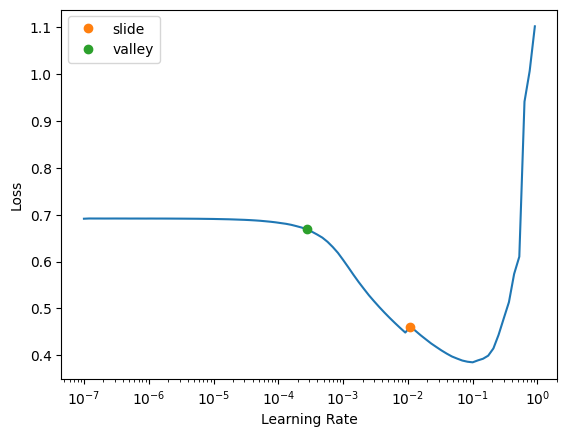

In [30]:
learner.lr_find(suggest_funcs=[slide, valley])

In [31]:
learner.fit_one_cycle(2,5.62e-3)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.028281,0.025106,0.990823,02:31
1,0.019725,0.017751,0.993047,02:33


In [32]:
learner.save("paper-classifier-stage-0-distilroberta")

Path('models/paper-classifier-stage-0-distilroberta.pth')

In [33]:
learner.export("models/paper-classifier-stage-0-distilroberta.pkl")

# Stage - 1

In [ ]:
learner.load('paper-classifier-stage-0')

In [34]:
learner.unfreeze()

SuggestedLRs(slide=0.00013182566908653826, valley=3.311311274956097e-06)

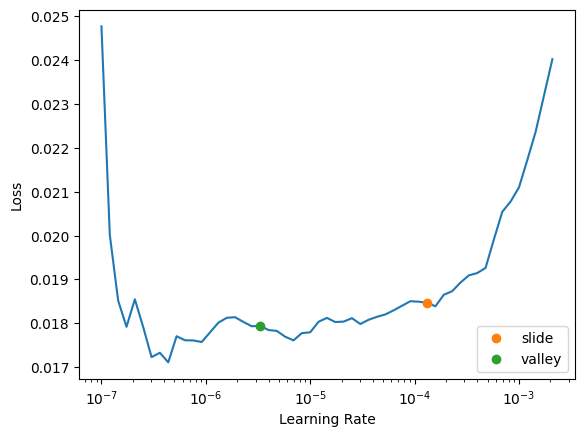

In [35]:
learner.lr_find(suggest_funcs=[slide, valley])

In [36]:
learner.fit_one_cycle(3,slice(1.01e-4, 4.52e-06))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.017112,0.015746,0.994190,03:17
1,0.014355,0.013916,0.994403,03:21
2,0.012864,0.013319,0.994758,03:20


In [37]:
learner.save("paper-classifier-stage-1-distilroberta")


Path('models/paper-classifier-stage-1-distilroberta.pth')

In [38]:
learner.export("models/paper-classifier-stage-1-distilroberta.pkl")